In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import disk
from misfit import MisfitFunction, DataMisfit, RegMisfit
from optimization import BBiter, CGiter
from core import ForwardSolver, getA, getP
from scipy.sparse import linalg
from scipy.ndimage import gaussian_filter
from scipy.io import loadmat

In [2]:
def slowness_model(n):
    # Model
    vback = 2.0
    vel = vback * np.ones(n)
    rr, cc = disk((n[0] // 2, n[1] // 2), radius=20, shape=vel.shape)
    vel[rr, cc] = 2.25

    m = 1. / (vel.reshape(-1, 1)) ** 2
    m0 = 1. / (vback * np.ones(n).reshape(-1, 1)) ** 2

    return m, m0

In [75]:
h = np.array([10., 10.])
f = np.array([4.9, 5., 5.1])

theta = np.linspace(0,2*np.pi,100)
xc = 500 + 400*np.cos(theta)
zc = 500 + 400*np.sin(theta)

xs = xc[0::2]
zs = zc[0::2]

xr = xc[1::2]
zr = zc[1::2]

n = np.array([101, 101])
z = np.arange(0, 1e3 + h[0], h[0])
x = np.arange(0, 1e3 + h[0], h[1])
q = np.eye(len(xs))

In [76]:
model = {
    'h': h,
    'f': f,
    'xr': xr,
    'zr': zr,
    'xs': xs,
    'zs': zs,
    'n': n,
    'z': z,
    'x': x,
    'q': q,
}

In [77]:
m, m0 = slowness_model(n)

Fm = ForwardSolver(model)
Dobs, Jo = Fm.solve(m0)

Dobs = Dobs.reshape(len(xs),len(xr),len(f))

/opt/anaconda3/lib/python3.8/site-packages/pylops/signalprocessing/Bilinear.py:122: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ncp_add_at(y, [self.iava_t, self.iava_l],
/opt/anaconda3/lib/python3.8/site-packages/pylops/signalprocessing/Bilinear.py:124: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ncp_add_at(y, [self.iava_t, self.iava_r],
/opt/anaconda3/lib/python3.8/site-packages/pylops/signalprocessing/Bilinear.py:126: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead

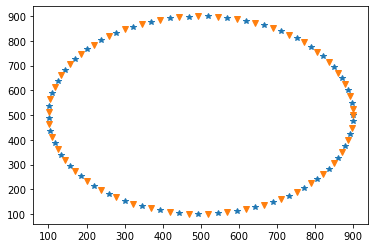

In [78]:
plt.plot(xs,zs,'*')
plt.plot(xr,zr,'v')

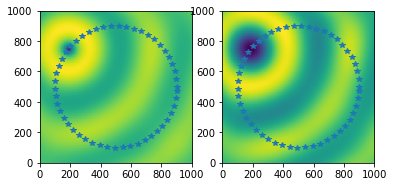

In [79]:
fig,ax = plt.subplots(1,2)

us = Jo.U[:,30,1].reshape(n)

ax[0].imshow(np.real(us),extent=[0,1e3,0,1e3])
ax[0].plot(xs,zs,'*')

ax[1].imshow(np.imag(us),extent=[0,1e3,0,1e3])
ax[1].plot(xs,zs,'*')

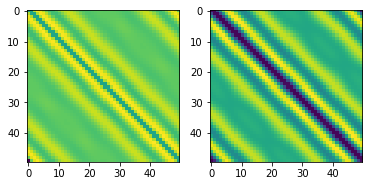

In [80]:
fig,ax = plt.subplots(1,2)

ax[0].imshow(np.real(Dobs[:,:,1]))
ax[1].imshow(np.imag(Dobs[:,:,1]))

In [81]:
G = np.zeros((len(xs),len(xr)),dtype=np.complex)

for i in range(len(xs)):
    for j in range(len(xs)):
        G[i,j] = np.vdot(Jo.U[:,i,1], Jo.U[:,j,1])

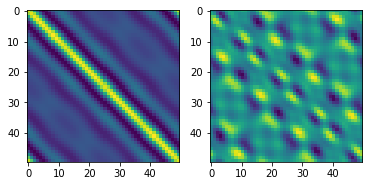

In [82]:
fig,ax = plt.subplots(1,2)

ax[0].imshow(np.real(G))
ax[1].imshow(np.imag(G))

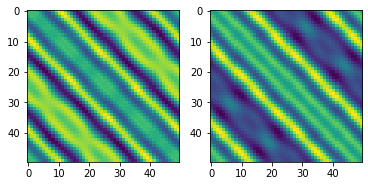

In [84]:
fig,ax = plt.subplots(1,2)

Gd = (Dobs[:,:,2] - Dobs[:,:,1])
ax[0].imshow(np.real(Gd))
ax[1].imshow(np.imag(Gd))